In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f_details = pd.read_csv('data/raw_fighter_details.csv')
df = pd.read_csv('data/raw_total_fight_data.csv', sep=";")

In [3]:
df.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,...,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,...,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72%,16%,37 of 40,42 of 52,...,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52%,36%,104 of 200,68 of 185,...,0 of 0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38%,29%,76 of 195,58 of 192,...,4 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44%,59%,66 of 146,81 of 131,...,6 of 6,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov


In [4]:
f_details.head()

,fighter_name,Height,Weight,Reach,Stance,DOB
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,NaN,NaN
1,AJ Matthews,"5' 11""",185 lbs.,NaN,NaN,NaN
2,AJ McKee,"5' 10""",145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,"5' 7""",135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,"6' 0""",145 lbs.,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   R_fighter        5144 non-null   object
 1   B_fighter        5144 non-null   object
 2   R_KD             5144 non-null   int64 
 3   B_KD             5144 non-null   int64 
 4   R_SIG_STR.       5144 non-null   object
 5   B_SIG_STR.       5144 non-null   object
 6   R_SIG_STR_pct    5144 non-null   object
 7   B_SIG_STR_pct    5144 non-null   object
 8   R_TOTAL_STR.     5144 non-null   object
 9   B_TOTAL_STR.     5144 non-null   object
 10  R_TD             5144 non-null   object
 11  B_TD             5144 non-null   object
 12  R_TD_pct         5144 non-null   object
 13  B_TD_pct         5144 non-null   object
 14  R_SUB_ATT        5144 non-null   int64 
 15  B_SUB_ATT        5144 non-null   int64 
 16  R_PASS           5144 non-null   int64 
 17  B_PASS           5144 non-null   

Column definitions:¶
* R_ and B_ prefix signifies red and blue corner fighter stats respectively
* KD is number of knockdowns
* SIG_STR is no. of significant strikes 'landed of attempted'
* SIG_STR_pct is significant strikes percentage
* TOTAL_STR is total strikes 'landed of attempted'
* TD is no. of takedowns
* TD_pct is takedown percentages
* SUB_ATT is no. of submission attempts
* PASS is no. times the guard was passed?
* REV?
* HEAD is no. of significant strinks to the head 'landed of attempted'
* BODY is no. of significant strikes to the body 'landed of attempted'
* CLINCH is no. of significant strikes in the clinch 'landed of attempted'
* GROUND is no. of significant strikes on the ground 'landed of attempted'
* win_by is method of win
* last_round is last round of the fight (ex. if it was a KO in 1st, then this will be 1)
* last_round_time is when the fight ended in the last round
* Format is the format of the fight (3 rounds, 5 rounds etc.)
* Referee is the name of the Ref
* date is the date of the fight
* location is the location in which the event took place
* Fight_type is which weight class and whether it's a title bout or not
* Winner is the winner of the fight

In [6]:
df.columns

Index(['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND', 'win_by', 'last_round',
       'last_round_time', 'Format', 'Referee', 'date', 'location',
       'Fight_type', 'Winner'],
      dtype='object')

In [7]:
columns = ['R_SIG_STR.', 'B_SIG_STR.', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_HEAD', 'B_HEAD', 'R_BODY','B_BODY', 'R_LEG', 'B_LEG', 
        'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH','B_CLINCH', 'R_GROUND', 'B_GROUND']

In [8]:
attemp = '_att'
landed = '_landed'

for column in columns:
    df[column+attemp] = df[column].apply(lambda X: int(X.split('of')[1]))
    df[column+landed] = df[column].apply(lambda X: int(X.split('of')[0]))
    
df.drop(columns, axis=1, inplace=True)

In [9]:
df.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,...,B_DISTANCE_att,B_DISTANCE_landed,R_CLINCH_att,R_CLINCH_landed,B_CLINCH_att,B_CLINCH_landed,R_GROUND_att,R_GROUND_landed,B_GROUND_att,B_GROUND_landed
0,Henry Cejudo,Marlon Moraes,0,0,52%,47%,25%,0%,1,0,...,116,54,23,19,2,2,30,26,1,1
1,Valentina Shevchenko,Jessica Eye,1,0,72%,16%,100%,0%,1,0,...,12,2,2,2,0,0,1,1,0,0
2,Tony Ferguson,Donald Cerrone,0,0,52%,36%,0%,100%,0,0,...,184,68,2,1,1,0,0,0,0,0
3,Jimmie Rivera,Petr Yan,0,2,38%,29%,0%,33%,0,0,...,167,42,15,9,12,10,4,4,10,4
4,Tai Tuivasa,Blagoy Ivanov,0,1,44%,59%,0%,100%,0,0,...,111,62,18,14,6,5,0,0,6,6


In [10]:
pct_columns = ['R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct']

for column in pct_columns:
    df[column] = df[column].apply(lambda X: float(X.replace('%', ''))/100)

In [11]:
def Division(X):
    for Division in weight_classes:
        if Division in X:
            return Division
    if X == 'Catch Weight Bout' or 'Catchweight Bout':
        return 'Catch Weight'
    else:
        return 'Open Weight'

In [12]:
weight_classes = ['Women\'s Strawweight', 'Women\'s Bantamweight', 
                  'Women\'s Featherweight', 'Women\'s Flyweight', 'Lightweight', 
                  'Welterweight', 'Middleweight','Light Heavyweight', 
                  'Heavyweight', 'Featherweight','Bantamweight', 'Flyweight', 'Open Weight']

df['weight_class'] = df['Fight_type'].apply(Division)

In [13]:
df['weight_class'].value_counts()

Lightweight              989
Welterweight             969
Middleweight             725
Heavyweight              507
Light Heavyweight        502
Featherweight            442
Bantamweight             379
Flyweight                187
Women's Strawweight      143
Women's Bantamweight     111
Open Weight               92
Women's Flyweight         50
Catch Weight              38
Women's Featherweight     10
Name: weight_class, dtype: int64

In [14]:
def get_rounds(X):
    if X == 'No Time Limit':
        return 1
    else:
        return len(X.split('(')[1].replace(')', '').split('-'))
    
df['no_of_rounds'] = df['Format'].apply(get_rounds)

In [15]:
df['Winner'].isnull().sum()

83

In [16]:
df['Winner'].fillna('Draw', inplace=True)

In [17]:
def get_renamed_winner(row):
    if row['R_fighter'] == row['Winner']:
        return 'Red'
    elif row['B_fighter'] == row['Winner']:
        return 'Blue'
    elif row['Winner'] == 'Draw':
        return 'Draw'
    
df['Winner'] = df[['R_fighter','B_fighter', 'Winner']].apply(get_renamed_winner, axis=1)

In [18]:
df['Winner'].value_counts()

Red     3470
Blue    1591
Draw      83
Name: Winner, dtype: int64

Inch to CM

In [19]:
def convert_to_cms(X):
    if X is np.NaN:
        return X
    elif len(X.split("'")) == 2:
        feet = float(X.split("'")[0])
        inches = int(X.split("'")[1].replace(' ', '').replace('"',''))
        return (feet * 30.48) + (inches * 2.54)
    else:
        return float(X.replace('"', '')) * 2.54

In [20]:
f_details['Height'] = f_details['Height'].apply(convert_to_cms)
f_details['Reach'] = f_details['Reach'].apply(convert_to_cms)

In [21]:
f_details['Weight'] = f_details['Weight'].apply(lambda X: float(X.replace(' lbs.', '')) if X is not np.NaN else X)

In [22]:
f_details.head()

,fighter_name,Height,Weight,Reach,Stance,DOB
0,AJ Fonseca,162.56,145.0,NaN,NaN,NaN
1,AJ Matthews,180.34,185.0,NaN,NaN,NaN
2,AJ McKee,177.80,145.0,NaN,NaN,NaN
3,AJ Siscoe,170.18,135.0,NaN,NaN,NaN
4,Aalon Cruz,182.88,145.0,NaN,NaN,NaN


In [23]:
new = df.merge(f_details, left_on='R_fighter', right_on='fighter_name', how='left')

In [24]:
new = new.drop('fighter_name', axis=1)

In [25]:
new.rename(columns={'Height':'R_Height',
                   'Weight': 'R_Weight',
                   'Reach': 'R_Reach',
                   'Stance': 'R_Stance',
                   'DOB': 'R_DOB'},
                    inplace=True)

In [26]:
new = new.merge(f_details, left_on='B_fighter', right_on='fighter_name', how='left')

In [27]:
new = new.drop('fighter_name', axis=1)

In [28]:
new.rename(columns={'Height':'B_height',
                   'Weight': 'B_Weight',
                   'Reach': 'B_Reach',
                   'Stance': 'B_Stance',
                   'DOB': 'B_DOB'},
                   inplace=True)

In [29]:
new.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,...,R_Height,R_Weight,R_Reach,R_Stance,R_DOB,B_height,B_Weight,B_Reach,B_Stance,B_DOB
0,Henry Cejudo,Marlon Moraes,0,0,0.52,0.47,0.25,0.00,1,0,...,162.56,135.0,162.56,Orthodox,"Feb 09, 1987",167.64,135.0,170.18,Orthodox,"Apr 26, 1988"
1,Valentina Shevchenko,Jessica Eye,1,0,0.72,0.16,1.00,0.00,1,0,...,165.10,125.0,167.64,Southpaw,"Mar 07, 1988",167.64,125.0,167.64,Orthodox,"Jul 27, 1986"
2,Tony Ferguson,Donald Cerrone,0,0,0.52,0.36,0.00,1.00,0,0,...,180.34,155.0,193.04,Orthodox,"Feb 12, 1984",185.42,155.0,185.42,Orthodox,"Mar 29, 1983"
3,Jimmie Rivera,Petr Yan,0,2,0.38,0.29,0.00,0.33,0,0,...,162.56,135.0,172.72,Orthodox,"Jun 29, 1989",170.18,135.0,170.18,Switch,"Feb 11, 1993"
4,Tai Tuivasa,Blagoy Ivanov,0,1,0.44,0.59,0.00,1.00,0,0,...,187.96,264.0,190.50,Southpaw,"Mar 16, 1993",180.34,250.0,185.42,Southpaw,"Oct 09, 1986"


In [30]:
new.to_csv(r'C:\Users\theun\OneDrive\Desktop\data\ufc\data\new_data.csv', index=False, header=True)

In [31]:
new['R_DOB'] = pd.to_datetime(new['R_DOB'])
new['B_DOB'] = pd.to_datetime(new['B_DOB'])
new['date'] = pd.to_datetime(new['date'])

In [32]:
new['R_year'] = new['R_DOB'].apply(lambda x: x.year)
new['B_year'] = new['B_DOB'].apply(lambda x: x.year)
new['date_year'] = new['date'].apply(lambda x: x.year)

In [33]:
def get_age(row):
    B_age = (row['date_year'] - row['B_year'])
    R_age = (row['date_year'] - row['R_year'])
    if np.isnan(B_age)!=True:
        B_age = B_age
    if np.isnan(R_age)!=True:
        R_age = R_age
    return pd.Series([B_age, R_age], index=['B_age','R_age'])

In [34]:
new[['B_age', 'R_age']] = new[['date_year', 'R_year', 'B_year']].apply(get_age, axis=1)

In [35]:
new.drop(['R_DOB', 'B_DOB', 'date_year', 'R_year', 'B_year'], axis=1, inplace=True)

In [36]:
new['country'] = new['location'].apply(lambda x: x.split(',')[-1])

In [37]:
new['date_year'] = new['date'].apply(lambda x: x.year)

In [38]:
new.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,...,R_Reach,R_Stance,B_height,B_Weight,B_Reach,B_Stance,B_age,R_age,country,date_year
0,Henry Cejudo,Marlon Moraes,0,0,0.52,0.47,0.25,0.00,1,0,...,162.56,Orthodox,167.64,135.0,170.18,Orthodox,31.0,32.0,USA,2019
1,Valentina Shevchenko,Jessica Eye,1,0,0.72,0.16,1.00,0.00,1,0,...,167.64,Southpaw,167.64,125.0,167.64,Orthodox,33.0,31.0,USA,2019
2,Tony Ferguson,Donald Cerrone,0,0,0.52,0.36,0.00,1.00,0,0,...,193.04,Orthodox,185.42,155.0,185.42,Orthodox,36.0,35.0,USA,2019
3,Jimmie Rivera,Petr Yan,0,2,0.38,0.29,0.00,0.33,0,0,...,172.72,Orthodox,170.18,135.0,170.18,Switch,26.0,30.0,USA,2019
4,Tai Tuivasa,Blagoy Ivanov,0,1,0.44,0.59,0.00,1.00,0,0,...,190.50,Southpaw,180.34,250.0,185.42,Southpaw,33.0,26.0,USA,2019


In [39]:
new.to_csv(r'C:\Users\theun\OneDrive\Desktop\data\ufc\data\new_data.csv', index=False, header=True)

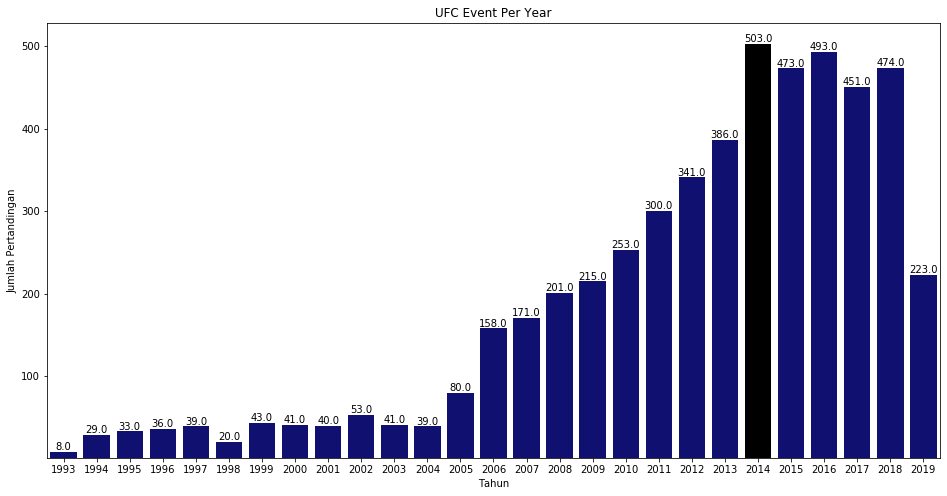

In [40]:
values = new['date_year'].sort_values(ascending=False).value_counts().sort_index()
labels = values.index

clrs = ['navy' if (y < max(values)) else 'black' for y in values]

plt.figure(figsize=(16,8))
bar = sns.barplot(x=labels, y=values, palette=clrs)

ax=plt.gca()
y_max = values.max()
ax.set_ylim(1)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(),
           fontsize=10, color='black', ha='center', va='bottom')
    
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pertandingan')
plt.title('UFC Event Per Year')
plt.show()

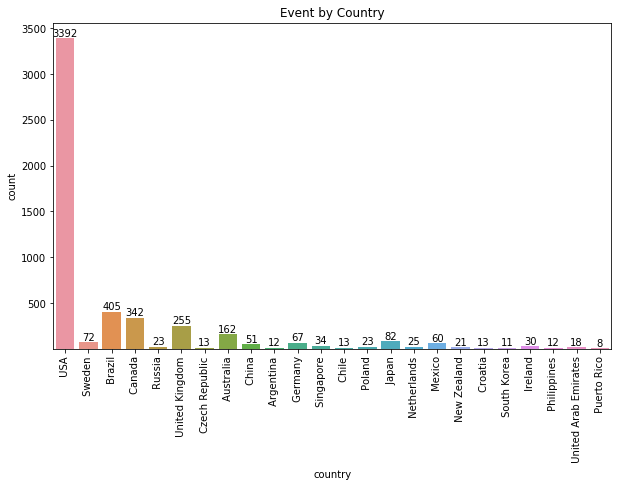

In [41]:
plt.figure(figsize=(10,6))
bar = sns.countplot(new['country'])
plt.xticks(rotation=90)
ax = plt.gca()
y_max = new['country'].value_counts().max()
ax.set_ylim(1)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(),
           fontsize=10, color='black', ha='center', va='bottom')
    
plt.title('Event by Country')
plt.show()

In [43]:
women = new.weight_class.str.contains('Women')


In [45]:
women1 = len(new[women])
men = (len(new['weight_class'])) - len(new[women])

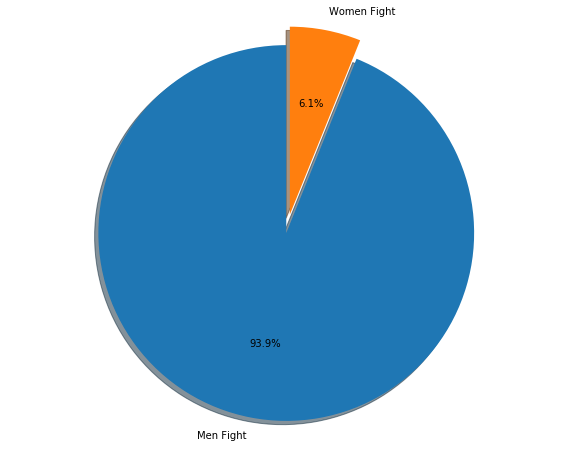

In [46]:
labels = 'Men Fight', 'Women Fight'
sizes = [men,women1]
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%',
       shadow=True, startangle=90)
ax1.axis('equal')

plt.show()